##  Generally 3 steps involves in training pipeline
### 1) Design Model (input size, output size, forward pass)
### 2) Construct loss and optimizer
### 3) Training loop includes the following:
###     - forward pass: compute prediction
###     - backward pass: gradients
###     - update weights

In [24]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [25]:
# prepare regression data
x, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [26]:
X = torch.from_numpy(x.astype(np.float32))
Y = torch.from_numpy(y.astype(np.float32))
print(X.shape, Y.shape)
# reshape Y
Y = Y.view(Y.shape[0], 1)
print(Y.shape)

torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1])


In [27]:
n_samples, n_features = X.shape

# Presteps of Preparing Model to Use
### 1) model
### 2) loss and optimizer
### 3) training loop

In [28]:
# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [29]:
# 2) loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [30]:
# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, Y)
    
    #backward pass
    loss.backward()
    
    # update paramters
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')

epoch: 10, loss: 4346.0713
epoch: 20, loss: 3241.9170
epoch: 30, loss: 2443.4878
epoch: 40, loss: 1865.4916
epoch: 50, loss: 1446.6385
epoch: 60, loss: 1142.8219
epoch: 70, loss: 922.2527
epoch: 80, loss: 761.9911
epoch: 90, loss: 645.4606
epoch: 100, loss: 560.6697


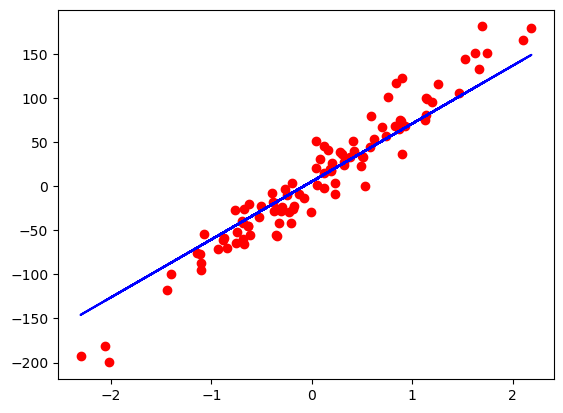

In [32]:
# plot
predicted = model(X).detach().numpy()
plt.plot(x, y, 'ro')
plt.plot(x, predicted, 'b')
plt.show()